In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('../Data/cleaned_climate_data.csv')
df = pd.read_csv('../Data/climate_disease_dataset.csv')
df.head()

,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget
0,2000,1,Palestinian Territory,Central,28.132468,152.083870,110.487231,12.000000,53,145,113,1068
1,2000,2,Palestinian Territory,Central,30.886500,119.591418,83.467928,12.000000,132,48,113,1068
2,2000,3,Palestinian Territory,Central,31.366433,95.876124,93.095292,12.000000,34,80,113,1068
3,2000,4,Palestinian Territory,Central,28.481870,175.315731,105.530192,9.395894,23,133,113,1068
4,2000,5,Palestinian Territory,Central,26.890370,191.445990,60.205979,9.935726,39,74,113,1068


In [3]:
threshold = 100
df['dengue_outbreak'] = df['dengue_cases'].apply(lambda x: 1 if x >= threshold else 0)
# df = df.drop(columns=['date','district','province'])
df = df.drop(columns=['country','region','dengue_cases','year','month'])

In [4]:
X = df.iloc[:,0:12]
X

,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,population_density,healthcare_budget,dengue_outbreak
0,28.132468,152.083870,110.487231,12.000000,53,113,1068,1
1,30.886500,119.591418,83.467928,12.000000,132,113,1068,0
2,31.366433,95.876124,93.095292,12.000000,34,113,1068,0
3,28.481870,175.315731,105.530192,9.395894,23,113,1068,1
4,26.890370,191.445990,60.205979,9.935726,39,113,1068,0
...,...,...,...,...,...,...,...,...
34555,13.040751,369.269763,70.218442,12.000000,149,52,399,0
34556,9.811456,271.028130,74.749481,8.432640,56,52,399,0
34557,12.308443,228.392496,91.096407,8.034754,104,52,399,0
34558,20.197689,196.673067,128.859240,12.000000,142,52,399,0


In [5]:
# y = df.iloc[:,7]
y = df['dengue_outbreak']
y

0        1
1        0
2        0
3        1
4        0
        ..
34555    0
34556    0
34557    0
34558    0
34559    1
Name: dengue_outbreak, Length: 34560, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf = RandomForestRegressor()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

1.0

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4937
           1       1.00      1.00      1.00      1975

    accuracy                           1.00      6912
   macro avg       1.00      1.00      1.00      6912
weighted avg       1.00      1.00      1.00      6912



In [10]:
features =  pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
features.head(10)

,importance
dengue_outbreak,0.912871
avg_temp_c,0.043953
precipitation_mm,0.015228
uv_index,0.008247
malaria_cases,0.006855
healthcare_budget,0.005680
air_quality_index,0.004743
population_density,0.002423


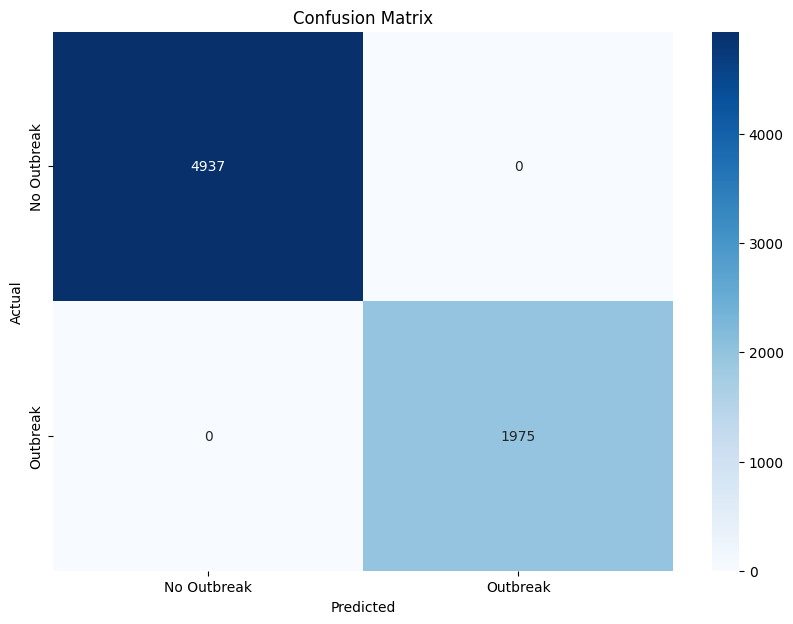

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Outbreak', 'Outbreak'], yticklabels=['No Outbreak', 'Outbreak'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')

print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')    

In [13]:
# Additional evaluation metrics
from sklearn.metrics import balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import roc_auc_score, average_precision_score, log_loss
from sklearn.metrics import jaccard_score

# Get prediction probabilities for probabilistic metrics
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probability of positive class

print("\n=== Additional Metrics ===")

# Balanced Accuracy (useful for imbalanced datasets)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc:.3f}')

# Cohen's Kappa (measures agreement beyond chance)
kappa = cohen_kappa_score(y_test, y_pred)
print(f'Cohen\'s Kappa: {kappa:.3f}')

# Matthews Correlation Coefficient (good for imbalanced data)
mcc = matthews_corrcoef(y_test, y_pred)
print(f'Matthews Correlation Coefficient: {mcc:.3f}')

# ROC AUC Score (Area Under Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.3f}')

# Average Precision Score (PR AUC)
avg_precision = average_precision_score(y_test, y_pred_proba)
print(f'Average Precision Score (PR AUC): {avg_precision:.3f}')

# Log Loss (Cross-entropy loss)
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss:.3f}')

# Jaccard Score (Intersection over Union)
jaccard = jaccard_score(y_test, y_pred)
print(f'Jaccard Score: {jaccard:.3f}')

# Specificity (True Negative Rate)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)
print(f'Specificity (True Negative Rate): {specificity:.3f}')

# False Positive Rate
fpr = fp / (fp + tn)
print(f'False Positive Rate: {fpr:.3f}')

# False Negative Rate
fnr = fn / (fn + tp)
print(f'False Negative Rate: {fnr:.3f}')

# Positive Predictive Value (same as precision)
ppv = tp / (tp + fp)
print(f'Positive Predictive Value: {ppv:.3f}')

# Negative Predictive Value
npv = tn / (tn + fn)
print(f'Negative Predictive Value: {npv:.3f}')


=== Additional Metrics ===
Balanced Accuracy: 1.000
Cohen's Kappa: 1.000
Matthews Correlation Coefficient: 1.000
ROC AUC Score: 1.000
Average Precision Score (PR AUC): 1.000
Log Loss: 0.006
Jaccard Score: 1.000
Specificity (True Negative Rate): 1.000
False Positive Rate: 0.000
False Negative Rate: 0.000
Positive Predictive Value: 1.000
Negative Predictive Value: 1.000


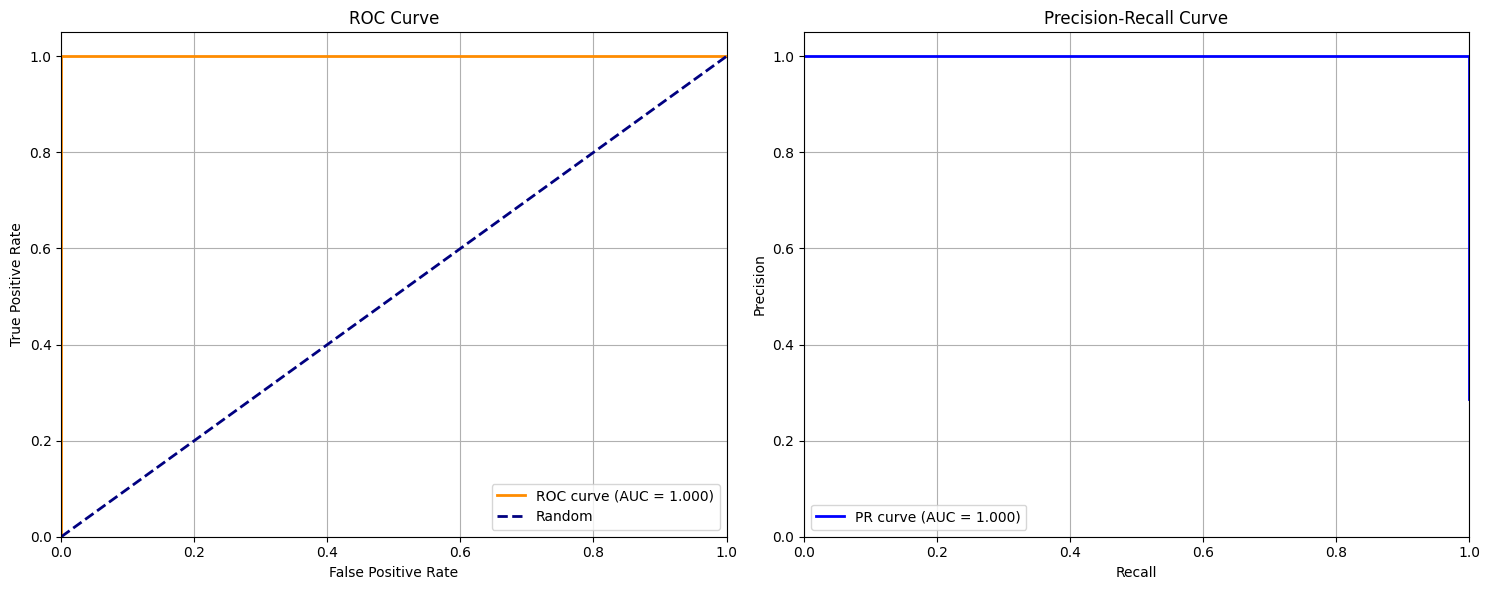

In [14]:
# Visualization of additional metrics
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Create subplot for ROC and PR curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend(loc="lower right")
ax1.grid(True)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
ax2.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AUC = {avg_precision:.3f})')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend(loc="lower left")
ax2.grid(True)

plt.tight_layout()
plt.show()

In [15]:
# Comprehensive metrics summary
metrics_summary = pd.DataFrame({
    'Metric': [
        'Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score',
        'Specificity', 'NPV', 'ROC AUC', 'PR AUC', 'Cohen\'s Kappa', 
        'MCC', 'Jaccard Score', 'Log Loss'
    ],
    'Score': [
        accuracy, balanced_acc, precision, recall, f1,
        specificity, npv, roc_auc, avg_precision, kappa,
        mcc, jaccard, logloss
    ],
    'Description': [
        'Overall correctness',
        'Accuracy accounting for class imbalance',
        'Positive predictive value',
        'Sensitivity / True positive rate',
        'Harmonic mean of precision and recall',
        'True negative rate',
        'Negative predictive value',
        'Area under ROC curve',
        'Area under PR curve',
        'Agreement beyond chance',
        'Correlation coefficient for binary classification',
        'Intersection over union',
        'Probabilistic loss function'
    ]
})

print("=== Model Performance Summary ===")
print(metrics_summary.round(3).to_string(index=False))

=== Model Performance Summary ===
           Metric  Score                                       Description
         Accuracy  1.000                               Overall correctness
Balanced Accuracy  1.000           Accuracy accounting for class imbalance
        Precision  1.000                         Positive predictive value
           Recall  1.000                  Sensitivity / True positive rate
         F1 Score  1.000             Harmonic mean of precision and recall
      Specificity  1.000                                True negative rate
              NPV  1.000                         Negative predictive value
          ROC AUC  1.000                              Area under ROC curve
           PR AUC  1.000                               Area under PR curve
    Cohen's Kappa  1.000                           Agreement beyond chance
              MCC  1.000 Correlation coefficient for binary classification
    Jaccard Score  1.000                           Intersection ov